In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tqdm as tqdm
import os

In [2]:
path = '../../data/baseData/Modified/'

df = pd.read_csv(path + 'BA_ratbeer.csv')

In [6]:
df.head()

,Unnamed: 0,beer_name,beer_id,brewery_name,brewery_id,style,user_id,appearance,aroma,palate,taste,overall,rating,user_location,avg,beer_location
0,0,Régab,142544,Societe des Brasseries du Gabon (SOBRAGA),37262,Euro Pale Lager,nmann08.184925,3.25,2.75,3.25,2.75,3.0,2.88,"United States, Washington",2.88,Gabon
1,1,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,stjamesgate.163714,3.00,3.50,3.50,4.00,3.5,3.67,"United States, New York",3.85,Northern Ireland
2,2,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,mdagnew.19527,4.00,3.50,3.50,4.00,3.5,3.73,Northern Ireland,3.85,Northern Ireland
3,3,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,helloloser12345.10867,4.00,3.50,4.00,4.00,4.5,3.98,Northern Ireland,3.85,Northern Ireland
4,4,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,cypressbob.3708,4.00,4.00,4.00,4.00,4.0,4.00,Northern Ireland,3.85,Northern Ireland


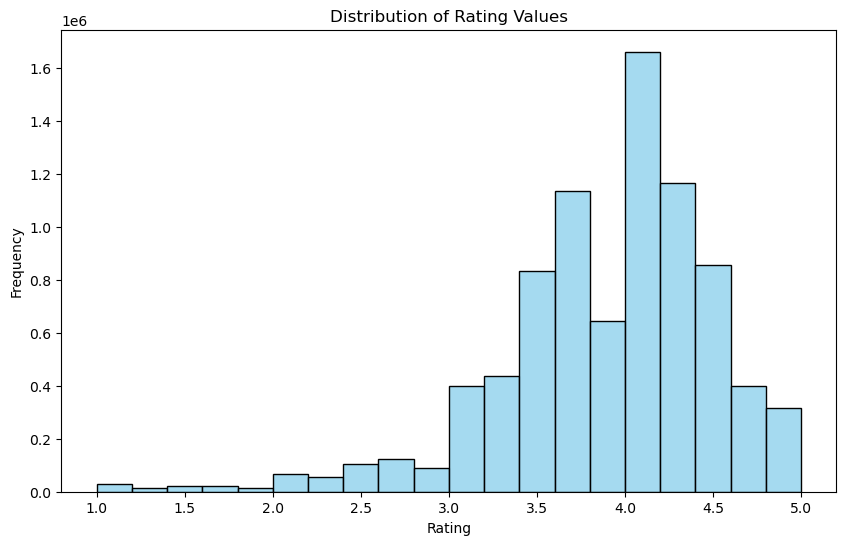

In [8]:
# Plotting the distribution of ratings using a histogram and KDE
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=20, color='skyblue')

# Add labels and title
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Rating Values')
plt.show()

In [7]:
dtype_BAs_beers = {
    'beer_id': 'int64',
    'beer_name': 'string',
    'brewery_id': 'int64',
    'brewery_name': 'string',
    'style': 'string',
    'nbr_ratings': 'int64',
    'avg': 'float64',
}

dtype_BAs_breweries = {
    'id': 'int64',
    'location': 'string',
    'name': 'string',
    'nbr_beers': 'int64'
}

dtype_BAs_ratings = {
    'beer_name': 'string',
    'beer_id': 'int64',
    'brewery_name': 'string',
    'brewery_id': 'int64',
    'style': 'string',
    'user_id': 'string',    # This is 'user_name' + '.' + 'int64', I put it as a string as it would be easier to modify
    'appearance': 'float64',
    'aroma': 'float64',
    'palate': 'float64',
    'taste': 'float64',
    'overall': 'float64',
    'rating': 'float64',
}

dtype_BAs_users = {
    'nbr_ratings': 'int64',
    'user_id': 'string',    # This is 'user_name' + '.' + 'int64', I put it as a string as it would be easier to modify
    'location': 'string'
}

In [24]:
# import data
BAs_path = 'baseData/minimizedData/'

BAs_beers = pd.read_csv(BAs_path + 'BA_beers_small.csv', dtype=dtype_BAs_beers)
BAs_breweries = pd.read_csv(BAs_path + 'BA_breweries_small.csv', dtype=dtype_BAs_breweries)
BAs_ratings = pd.read_csv(BAs_path + 'BA_ratings_small.csv', dtype=dtype_BAs_ratings)
BAs_users = pd.read_csv(BAs_path + 'BA_users_small.csv', dtype=dtype_BAs_users)

In [25]:
BAs_beers.info()
BAs_breweries.info()
BAs_ratings.info()
BAs_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280823 entries, 0 to 280822
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    280823 non-null  int64  
 1   beer_id       280823 non-null  int64  
 2   beer_name     280823 non-null  string 
 3   brewery_id    280823 non-null  int64  
 4   brewery_name  280823 non-null  string 
 5   style         280823 non-null  string 
 6   nbr_ratings   280823 non-null  int64  
 7   avg           247994 non-null  float64
dtypes: float64(1), int64(4), string(3)
memory usage: 17.1 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16758 entries, 0 to 16757
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  16758 non-null  int64 
 1   id          16758 non-null  int64 
 2   location    16758 non-null  string
 3   name        16758 non-null  string
 4   nbr_beers   16758 non-null  int64 


What has to be done:

Input: Country name (x)

Output: ratings given to beer of each country that is not x from reviewers of country x.

It needs all the ratings to have a country associated

In [26]:
def add_country(df_loc, df_no_loc, identifier):
    df_ratings_loc = df_no_loc.merge(df_loc[[identifier, 'location']], on=identifier, how='left')

    return df_ratings_loc


In [27]:
BAs_breweries = BAs_breweries.rename(columns={'id': 'brewery_id'})

In [28]:
BAs_beers_loc = add_country(df_loc=BAs_breweries, df_no_loc=BAs_beers, identifier='brewery_id')
BAs_ratings_loc = add_country(df_loc=BAs_users, df_no_loc=BAs_ratings, identifier='user_id')

In [29]:
BAs_beers_loc.info()
BAs_ratings_loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280823 entries, 0 to 280822
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    280823 non-null  int64  
 1   beer_id       280823 non-null  int64  
 2   beer_name     280823 non-null  string 
 3   brewery_id    280823 non-null  int64  
 4   brewery_name  280823 non-null  string 
 5   style         280823 non-null  string 
 6   nbr_ratings   280823 non-null  int64  
 7   avg           247994 non-null  float64
 8   location      280823 non-null  string 
dtypes: float64(1), int64(4), string(4)
memory usage: 19.3 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8393032 entries, 0 to 8393031
Data columns (total 14 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Unnamed: 0    int64  
 1   beer_name     string 
 2   beer_id       int64  
 3   brewery_name  string 
 4   brewery_id    int64  
 5   style         string 
 6   user_id   

With the data now having the needed information, a function that takes in a target country (e.g., Germany) will then for each unique other country's beer, test how the vote is given.

Possible course of action, 

work with separate dataframes, for beers, remove chosen country, for ratings select only chosen country, then for each rating, verify for the specific beer id the difference

create a new dataframe where each rating has the beer avg added and the location of the beer, then in the df, chose to keep only the ratings with user_location given and beer_location !=, then take the difference between the rating and the avg. This could be a single df made and used in multiple applications

In [30]:
#Merge rating and beer

BAs_beers_loc = BAs_beers_loc.rename(columns={'location': 'beer_location'})
BAs_ratings_loc = BAs_ratings_loc.rename(columns={'location': 'user_location'})

BAs_ratbeer = BAs_ratings_loc.merge(BAs_beers_loc[['beer_id', 'avg', 'beer_location']], on='beer_id', how='left')

In [45]:
def differnce_onCountry(location, df):
    df = df[df['user_location'] == location]
    df = df[df['beer_location'] != location]

    df['rating_diff'] = df['rating'] - df['avg']

    result_beer = df.groupby(['user_location', 'beer_id', 'beer_location']).agg(
        avg_rating_diff=('rating_diff', 'mean'), count=('rating_diff', 'size')).reset_index()
    
    result_location = result_beer.groupby(['user_location', 'beer_location']).agg(
        avg_rating_diff_location=('avg_rating_diff', 'mean'), total_count=('count', 'sum')).reset_index()

    return result_beer, result_location


In [46]:
result_beer, result_location = differnce_onCountry('England', BAs_ratbeer)

print(result_beer)

print(result_location)

      user_location  beer_id             beer_location  avg_rating_diff  count
0           England        5  United States, Louisiana         0.350000      2
1           England        6  United States, Louisiana        -0.355000      2
2           England        7  United States, Louisiana        -0.575000      2
3           England       10      United States, Maine         0.215000      2
4           England       14                   Belgium        -0.183333      6
...             ...      ...                       ...              ...    ...
10120       England   292637                    Poland         0.000000      1
10121       England   292665                   Belgium         0.000000      1
10122       England   293127                    Norway         0.020000      1
10123       England   293144                    Poland         0.000000      1
10124       England   293151                    Poland         0.000000      1

[10125 rows x 5 columns]
    user_location         